# A/B Testing Project: Cookie Cats  

## Introduction to A/B Testing  

A/B testing, also known as split testing, is a statistical method used to compare two versions of a variable to determine which performs better in achieving a specific goal. By splitting a target audience into two groups, A (control group) and B (treatment group), each group is exposed to a different version of the variable. Metrics of interest, such as user engagement or retention, are then measured to evaluate the effectiveness of each variation. This technique is widely applied in industries like marketing, product development, and gaming to make data-driven decisions that enhance user experience and business outcomes.  

## Project Background: Cookie Cats  

Cookie Cats, developed by Tactile Entertainment, is a highly engaging mobile puzzle game where players connect tiles of the same color to progress through levels. The game features unique elements such as singing cats, which add charm and fun to the gameplay.  

![Cookie Cats](https://m.media-amazon.com/images/I/811Xmdf4IcL.jpg)

To encourage in-app purchases and enhance player engagement, Cookie Cats incorporates "gates" at certain levels. These gates require players to either wait for a specified period or make a purchase to proceed further. Initially, the first gate was set at level 30.  

In this project, I will walk you through how we can conduct an A/B test to explore the impact of moving the first gate from level 30 to level 40. By analyzing player retention data, we aim to understand whether this adjustment improves player experience and engagement, providing insights into optimal gate placement strategies.

## A/B Testing Workflow
1. Define Questions and Hypothesis
2. Set Significance level and Power of test
3. Calculate Sample Size
4. Assign Users and Run the Experiment
5. Get Data and Prepocess Data
6. Interpret the Result: Perform Statistical Test 
7. From Results to Decisions

### <span style="color:red;">Step 1: Defind Questions and Hypothesis</span>
Not all statistically significant results are practically meaningful. How big of a difference (eg. revenue-per-use, retention increase) actually matters from a business perspective? In other words, what change is practically significant? Establishing this substantive boundary is important for understanding whether the difference is worth the costs of making the change. If our app generates billions of dollars like Google and Bing, then a 0.2% change is practically significant. In comparison, a startup may consider a 2% change too small. For this project, let's state that from a business perspective, an increase of 5 game sessions per user, or 2% retention increase after 1 day, or 5% retention increase after 7 days of installation are practically significant.

**Question 1: Has the average number of game sessions increased by 5 sessions?**<br>
- Null Hypothesis ($H_0$): The average number of game sessions in the treatment group has not increased by 5 sessions compared to the control group.
- Alternative Hypothesis ($H_1$): The average number of game sessions in the treatment group has increased by 5 sessions compared to the control group.

**Question 1: Has player retention increased by 2% after 1 day of installation?**<br>
- Null Hypothesis ($H_0$): The player retention rate one day after installation in the treatment group has not increased by 2% compared to the control group.
- Alternative Hypothesis ($H_1$): The player retention rate one day after installation in the treatment group has increased by 2% compared to the control group.

**Question 3: Has player retention increased by 5% after 7 days of installation?**<br>
- Null Hypothesis ($H_0$): The player retention rate seven days after installation in the treatment group has not increased by 5% compared to the control group.
- Alternative Hypothesis ($H_1$): The player retention rate seven days after installation in the treatment group has increased by 5% compared to the control group.

### <span style="color:red;">Step 2: Set Significance level and Power of test</span>
In hypothesis testing, it is crucial to set the acceptable probabilities for Type I and Type II errors to ensure the robustness of our test results.
- Type I error (error of commission or false positive, denoted by $\alpha$) is the probability of rejecting the null hypothesis when it is actually true. Significance level $\alpha$ is commonly accepted at 0.05 (5%)
- Type II error (error of omission or false negative, denoted by $\beta$) is the probability of failing to reject the null hypothesis when it is actually false. Power of test 1 - $\beta$ is commonly accepted at 0.80 (80%)

Based on standard practice and the need for robust conclusions, we will use the following values for our tests:
- Alpha ($\alpha$): 0.05 (5%)
- Beta ($\beta$): 0.20 (20%)
- Power: 0.80 (80%)

### <span style="color:red;">Step 3: Calculate Sample Size</span>
To calculate the sample size for a binary A/B test (a test where the output is binary, such as whether a user retains or not), we need to determine the proportions of success in both the control and treatment groups.  

The formula for calculating the required sample size for each group in a binary A/B test is:  
$$ n = \frac{2 \cdot (Z_{\alpha/2} + Z_{\beta})^2 \cdot \bar{p} \cdot (1 - \bar{p})}{d^2}   $$
Where:  
- $p_1$: baseline retention rate
- $p_2$: expected retention rate
- $\bar{p}$ = $\frac{p_1 + p_2}{2}$: The average proportion of success across control and treatment groups.  
- $d$ = $p_2$ - $p_1$: The minimum detectable effect (difference in proportions between treatment and control groups).  
- $Z_{\alpha/2}$ is the Z-score corresponding to the significance level for a two-tailed test
- $Z_{\beta}$ is the Z-score for the chosen power.

When we don’t know the baseline retention rate ($p_1$) and the expected retention rate ($p_2=p_1+d$), we can still calculate the required sample size by making reasonable assumptions.
- A common approach is to assume $p_1=0.5$ (50%). This is the most conservative estimate because the variance $p(1-p)$ is maximized at $p=0.5$
- If we later gather baseline data, we can update $p_1$ and recalculate the sample size.

In this project, we only have data collected after the experiment was conducted, so the baseline retention rate prior to the experiment is unavailable. We can estimate $p_1$ using retention rate of the control group (i.e., the group of users encountering the first gate at level 30). This allows us to evaluate whether the experiment was conducted with a sufficiently large sample size.

In [25]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Load the dataset
df = pd.read_csv('./cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


The table above presents the results of the experiment conducted on two groups of users:
- Column `version`: Indicate whether the player was put in the control group (`gate_30` - a gate at level 30) or the treatment group (`gate_40` - a gate at level 40)
- Column `sum_gamerounds`: The number of game rounds played by the player during the first week after install.
- Column `retention_1`: Did the player come back and play 1 day after installing?
- Column `retention_7`: Did the player come back and play 7 days after installing?

Let's assume the experiment was conducted with a sufficiently large sample size. We will come back to this again to calculate the required sample size after we preprocess the data in **Step 5**.

### <span style="color:red;">Step 4: Assign Users and Run the Experiment</span>
When a player installed the game, he or she was randomly assigned to either version `gate_30` or `gate_40`.

### <span style="color:red;">Step 5: Get Data and Preprocess Data</span>
- Generate summary statistics to understand the central tendency, dispersion, and distribution of the data.
- Handle missing data, outliers, unexpected data.
- Verify the data types of each column to ensure correctness.
- Group the data by the `version` column and calculated descriptive statistics, including skewness and kurtosis, to understand the distribution and identify any potential outliers.

In [26]:
# Check if user_id is not repetitive
if df['userid'].duplicated().any():
    print("Duplicates found in user_id. Dropping duplicates...")
    df = df.drop_duplicates(subset='userid')
else:
    print("No duplicates found in user_id")

df.set_index('userid', inplace=True)

No duplicates found in user_id


In [27]:
print("Summary statistics of the dataset:")
df.describe()

Summary statistics of the dataset:


,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,49854.000000


In [28]:
print("Data types and non-null counts:")
df.info()

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
Index: 90189 entries, 116 to 9999861
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   version         90189 non-null  object
 1   sum_gamerounds  90189 non-null  int64 
 2   retention_1     90189 non-null  bool  
 3   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(1), object(1)
memory usage: 2.2+ MB


In [29]:
print("Missing values in the dataset:")
df.isnull().sum()

Missing values in the dataset:


version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [30]:
# Descriptive statistics with skewness and kurtosis for "sum_gamerounds" column
descriptive_stats = df['sum_gamerounds'].describe().T
descriptive_stats['skewness'] = df['sum_gamerounds'].skew()
descriptive_stats['kurtosis'] = df['sum_gamerounds'].kurtosis()
print("Descriptive Statistics (including skewness and kurtosis):")
descriptive_stats

Descriptive Statistics (including skewness and kurtosis):


count       90189.000000
mean           51.872457
std           195.050858
min             0.000000
25%             5.000000
50%            16.000000
75%            51.000000
max         49854.000000
skewness      185.436313
kurtosis    47130.369631
Name: sum_gamerounds, dtype: float64

>- Positive skewness (>0): The tail on the right side of the distribution is longer or fatter. This indicates that the data has more extreme high values.
>- High kurtosis (>3): The distribution has heavy tails and more extreme outliers (leptokurtic).

In [31]:
# Percentage of each category in categorical columns
version_counts = df['version'].value_counts(normalize=True) * 100
retention_1_counts = df['retention_1'].value_counts(normalize=True) * 100
retention_7_counts = df['retention_7'].value_counts(normalize=True) * 100

print("Percentage of each user group in 'version':")
print(version_counts)
print("\nPercentage of each category in 'retention_1':")
print(retention_1_counts)
print("\nPercentage of each category in 'retention_7':")
print(retention_7_counts)

Percentage of each user group in 'version':
version
gate_40    50.437415
gate_30    49.562585
Name: proportion, dtype: float64

Percentage of each category in 'retention_1':
retention_1
False    55.47905
True     44.52095
Name: proportion, dtype: float64

Percentage of each category in 'retention_7':
retention_7
False    81.393518
True     18.606482
Name: proportion, dtype: float64


> The distribution of the `version` column is nearly equal, making it suitable for A/B testing as it ensures a balanced comparison between the control and treatment groups.

In [32]:
# Cross-tabulation for version and retention_1
crosstab_retention_1 = pd.crosstab(df['version'], df['retention_1'], normalize='index')
crosstab_retention_1.columns = ['Did not return', 'Returned']
crosstab_retention_1 = crosstab_retention_1.reset_index()

# Cross-tabulation for version and retention_7
crosstab_retention_7 = pd.crosstab(df['version'], df['retention_7'], normalize='index')
crosstab_retention_7.columns = ['Did not return', 'Returned']
crosstab_retention_7 = crosstab_retention_7.reset_index()

print("\nCross-tabulation for version and retention_1:")
print(crosstab_retention_1)

print("\nCross-tabulation for version and retention_7:")
print(crosstab_retention_7)


Cross-tabulation for version and retention_1:
   version  Did not return  Returned
0  gate_30        0.551812  0.448188
1  gate_40        0.557717  0.442283

Cross-tabulation for version and retention_7:
   version  Did not return  Returned
0  gate_30        0.809799  0.190201
1  gate_40        0.818000  0.182000


In [33]:
# Group by version and calculate descriptive statistics for sum_gamerounds columns
grouped_stats = df.groupby('version')[['sum_gamerounds']].describe()
print("Descriptive Statistics of 'sum_gamerounds' by Version")
grouped_stats

Descriptive Statistics of 'sum_gamerounds' by Version


sum_gamerounds                                                      
                 count       mean         std  min  25%   50%   75%      max
version                                                                     
gate_30        44700.0  52.456264  256.716423  0.0  5.0  17.0  50.0  49854.0
gate_40        45489.0  51.298776  103.294416  0.0  5.0  16.0  52.0   2640.0

In [34]:
skewness_by_version = df.groupby('version')[['sum_gamerounds']].apply(lambda x: x.skew()).unstack()
print("Skewness of Sum_gamerounds by Version:")
skewness_by_version

Skewness of Sum_gamerounds by Version:


                version
sum_gamerounds  gate_30    163.709871
                gate_40      5.967288
dtype: float64

In [35]:
kurtosis_by_version = df.groupby('version')[['sum_gamerounds']].apply(lambda x: x.kurtosis()).unstack()
print("Kurtosis of Sum_gamerounds by Version:")
kurtosis_by_version

Kurtosis of Sum_gamerounds by Version:


                version
sum_gamerounds  gate_30    31688.380643
                gate_40       63.106084
dtype: float64

>The `sum_gamerounds` column is highly skewed and has a high kurtosis value, indicating that while most users play a small number of rounds, there are outliers who play a significantly larger number of rounds. This skewness and the presence of outliers can impact the analysis and should be taken into consideration during hypothesis testing.

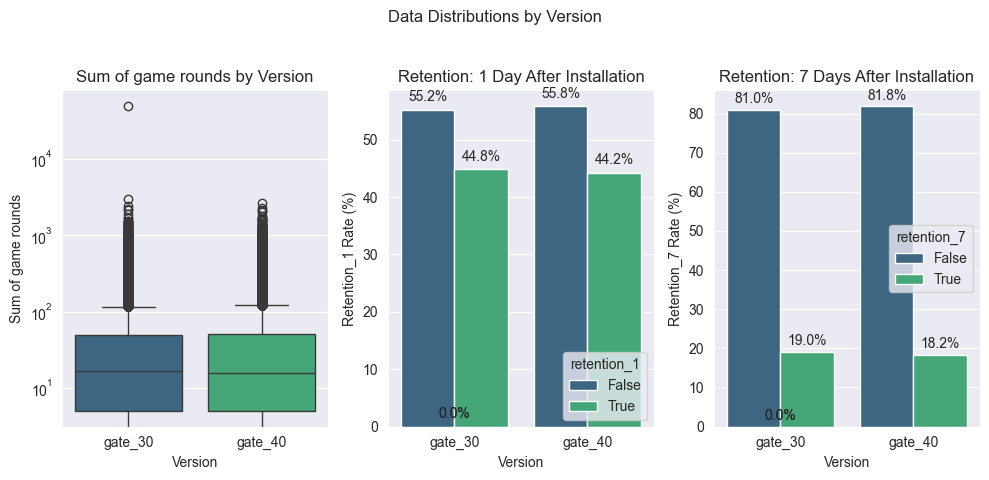

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
fig.suptitle('Data Distributions by Version', fontsize=12)

# Visualization of sum_gamerounds by version
sns.boxplot(ax=axes[0], x='version', y='sum_gamerounds', data=df, palette='viridis', hue='version')
axes[0].set_title('Sum of game rounds by Version')
axes[0].set_xlabel('Version')
axes[0].set_ylabel('Sum of game rounds')
axes[0].set_yscale('log')

# Visualization of retention_1 by version
retention_1_by_version = df.groupby(['version', 'retention_1']).size().reset_index(name='counts')
retention_1_by_version['percentage'] = retention_1_by_version['counts'] / retention_1_by_version.groupby('version')['counts'].transform('sum') * 100
sns.barplot(ax=axes[1], x='version', y='percentage', hue='retention_1', data=retention_1_by_version, palette='viridis')
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.1f}%', ha='center', va='bottom')
axes[1].set_title('Retention: 1 Day After Installation')
axes[1].set_xlabel('Version')
axes[1].set_ylabel('Retention_1 Rate (%)')

# Visualization of retention_7 by version
retention_7_by_version = df.groupby(['version', 'retention_7']).size().reset_index(name='counts')
retention_7_by_version['percentage'] = retention_7_by_version['counts'] / retention_7_by_version.groupby('version')['counts'].transform('sum') * 100
sns.barplot(ax=axes[2], x='version', y='percentage', hue='retention_7', data=retention_7_by_version, palette='viridis')
for p in axes[2].patches:
    height = p.get_height()
    axes[2].text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.1f}%', ha='center', va='bottom')
axes[2].set_title('Retention: 7 Days After Installation')
axes[2].set_xlabel('Version')
axes[2].set_ylabel('Retention_7 Rate (%)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

>The retention rate appears to have decreased in the treatment group compared to the control group. However, this observation alone is insufficient to draw conclusions. A statistical test is needed to determine whether this difference is significant or could have occurred by chance.

>To ensure our analysis is not skewed by extreme values, we will use the Interquartile Range (IQR) method to remove outliers from our dataset. 
>To ensure unbiased results in A/B testing, preprocessing steps like outlier handling and missing value imputation should be performed after splitting the data. This practice maintains the independence of control and treatment groups and ensures fair and tailored processing for each group.

In [37]:
# Separate control and treatment groups
control_group = df[df['version'] == 'gate_30']
treatment_group = df[df['version'] == 'gate_40']

# Remove outliers using the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the data
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# Remove outliers for the 'sum_gamerounds' column in control and treatment groups
control_group = remove_outliers_iqr(control_group, 'sum_gamerounds')
treatment_group = remove_outliers_iqr(treatment_group, 'sum_gamerounds')

# Check the shape of the cleaned data
print(f"Original control group shape: {df[df['version'] == 'gate_30'].shape}")
print(f"> Cleaned control group shape: {control_group.shape}")
print(f"> Filtered {df[df['version'] == 'gate_30'].shape[0] - control_group.shape[0]} users in control group")

print(f"\nOriginal treatment group shape: {df[df['version'] == 'gate_40'].shape}")
print(f"> Cleaned treatment group shape: {treatment_group.shape}")
print(f"> Filtered {df[df['version'] == 'gate_40'].shape[0] - treatment_group.shape[0]} users in treatment group")

Original control group shape: (44700, 4)
> Cleaned control group shape: (39493, 4)
> Filtered 5207 users in control group

Original treatment group shape: (45489, 4)
> Cleaned treatment group shape: (40471, 4)
> Filtered 5018 users in treatment group


In [38]:
# Concatenate the cleaned control and treatment groups
df = pd.concat([control_group, treatment_group])

# Verify the concatenation
print(f"Shape of the concatenated dataframe: {df.shape}")
print(df.sample(5))

Shape of the concatenated dataframe: (79964, 4)
         version  sum_gamerounds  retention_1  retention_7
userid                                                    
1866744  gate_40              59         True        False
4738891  gate_30               9        False        False
3587605  gate_30               1        False        False
500371   gate_40              61         True        False
5641959  gate_30              29         True        False


In [39]:
# Group by version and calculate descriptive statistics for numeric columns
grouped_stats = df.groupby('version')[["sum_gamerounds"]].describe()

# Additional skewness and kurtosis by version
skewness_by_version = df.groupby('version')[["sum_gamerounds"]].apply(lambda x: x.skew()).unstack()
kurtosis_by_version = df.groupby('version')[["sum_gamerounds"]].apply(lambda x: x.kurtosis()).unstack()

# Combine descriptive statistics with skewness and kurtosis
grouped_stats = grouped_stats.unstack().T
grouped_stats['skewness'] = skewness_by_version.T.values.flatten()
grouped_stats['kurtosis'] = kurtosis_by_version.T.values.flatten()
grouped_stats = grouped_stats.reset_index()

print("Descriptive Statistics with Skewness and Kurtosis by Version:")
print(grouped_stats)

Descriptive Statistics with Skewness and Kurtosis by Version:
           level_0 level_1  version                                         0
0   sum_gamerounds   count  gate_30                                   39493.0
1   sum_gamerounds   count  gate_40                                   40471.0
2   sum_gamerounds    mean  gate_30                                 23.596536
3   sum_gamerounds    mean  gate_40                                 24.245979
4   sum_gamerounds     std  gate_30                                 26.584511
5   sum_gamerounds     std  gate_40                                  28.17279
6   sum_gamerounds     min  gate_30                                       0.0
7   sum_gamerounds     min  gate_40                                       0.0
8   sum_gamerounds     25%  gate_30                                       4.0
9   sum_gamerounds     25%  gate_40                                       4.0
10  sum_gamerounds     50%  gate_30                                      13.0
11

>The distribution now has light tails and fewer extreme outliers (kurtosis < 3)
>
>Now go back to the sample size evaluation, we need to verify if the sample size of the experiment is sufficiently large.

In [40]:
import numpy as np
import scipy.stats as stats

# Required Sample Size: Hypothesis 1

# Define alpha, beta, and power
alpha = 0.05
beta = 0.20
power = 1 - beta

# Z-scores for the significance level (alpha) and power
Z_alpha = stats.norm.ppf(1 - alpha / 2)
Z_beta = stats.norm.ppf(power)

# Define effect size for "sum_gamerounds"
effect_size_sessions = 5  # Difference in average number of sessions

std_dev_sessions = pd.concat([control_group['sum_gamerounds'],treatment_group['sum_gamerounds']]).std()

n_sessions = int(((Z_alpha + Z_beta) * std_dev_sessions / effect_size_sessions) ** 2 * 2)

print(f"Required sample size for average number of game sessions test: {n_sessions}")

Required sample size for average number of game sessions test: 471


In [41]:
# Required Sample Size: Hypothesis 2 and 3

# Baseline and expected proportions for retention rates
p1_retention_1 = control_group['retention_1'].mean()
p2_retention_1 = p1_retention_1 + 0.02  # 2% increase for retention after 1 day

p1_retention_7 = control_group['retention_7'].mean()
p2_retention_7 = p1_retention_7 + 0.05  # 5% increase for retention after 7 days

# Function to calculate sample size for binary outcome
def calculate_sample_size_binary(p1, p2, Z_alpha, Z_beta):
    pooled_prob = (p1 + p2) / 2
    return int(((Z_alpha * (2 * pooled_prob * (1 - pooled_prob)) ** 0.5 + Z_beta * (p1 * (1 - p1) + p2 * (1 - p2)) ** 0.5) / (p1 - p2)) ** 2)

# Calculate sample sizes
n_retention_1 = calculate_sample_size_binary(p1_retention_1, p2_retention_1, Z_alpha, Z_beta)
n_retention_7 = calculate_sample_size_binary(p1_retention_7, p2_retention_7, Z_alpha, Z_beta)

print(f"Required sample size for retention rate after 1 day test: {n_retention_1}")
print(f"Required sample size for retention rate after 7 days test: {n_retention_7}")


Required sample size for retention rate after 1 day test: 9397
Required sample size for retention rate after 7 days test: 761


>By running the experiment with 37k users per group instead of 9k users or less, the test likely has greater power, reducing the risk of Type II errors (failing to detect a real effect). However, testing with excessively large samples can make even trivial differences statistically significant, which may not be practically meaningful.
>
> Hence, we need to randomly select users from the control and treatment groups based on the calculated sample size. This ensures that each group has an equal representation of users, and the test results are reliable.

In [45]:
# Randomly select users for control and treatment groups based on the calculated sample size for sum of game rounds
control_users_gamerounds = control_group.sample(n=int(n_sessions), random_state=42)
treatment_users_gamerounds = treatment_group.sample(n=int(n_sessions), random_state=42)

# Verify the sample sizes
print(f"Sample size for control group (sum of game rounds): {len(control_users_gamerounds)}")
print(f"Sample size for treatment group (sum of game rounds): {len(treatment_users_gamerounds)}")

Sample size for control group (sum of game rounds): 471
Sample size for treatment group (sum of game rounds): 471


In [46]:
# Set random seed for reproducibility
np.random.seed(42)

# Randomly select users for control and treatment groups based on the calculated sample size for retention after 1 day
control_users_retention_1 = control_group.sample(n=int(n_retention_1), random_state=42)
treatment_users_retention_1 = treatment_group.sample(n=int(n_retention_1), random_state=42)

# Verify the sample sizes
print(f"Sample size for control group (retention 1 day): {len(control_users_retention_1)}")
print(f"Sample size for treatment group (retention 1 day): {len(treatment_users_retention_1)}")

Sample size for control group (retention 1 day): 9397
Sample size for treatment group (retention 1 day): 9397


In [47]:
# Randomly select users for control and treatment groups based on the calculated sample size for retention after 7 days
control_users_retention_7 = control_group.sample(n=int(n_retention_7), random_state=43)
treatment_users_retention_7 = treatment_group.sample(n=int(n_retention_7), random_state=43)

# Verify the sample sizes
print(f"Sample size for control group (retention 7 days): {len(control_users_retention_7)}")
print(f"Sample size for treatment group (retention 7 days): {len(treatment_users_retention_7)}")

Sample size for control group (retention 7 days): 761
Sample size for treatment group (retention 7 days): 761


### <span style="color:red;">Step 6: Perform statistical test and Interpret the Result</span>

#### 1. Perform A/B Test for Sum of Game Rounds
Question: Has the average number of game sessions increased by 5 sessions?

To determine if the average number of game sessions has increased by 5 sessions in the treatment group compared to the control group, we will perform a two-sample t-test.

**Assumptions for the T-Test:**
- Independence: Observations in the sample must be independent of each other. This is typically ensured by random sampling and proper experimental design.
- Normality: For a t-test, we assume that the samples are drawn from a normally distributed population. This assumption can be relaxed if the sample size is large (Central Limit Theorem).
- Equal Variances: The t-test assumes that the variances of the two groups are equal. This can be tested using Levene’s test.

In [48]:
from scipy.stats import ttest_ind, levene

alpha = 0.05

# Calculate the means and standard deviations of the sum of game rounds in both groups
mean_control_gamerounds = control_users_gamerounds['sum_gamerounds'].mean()
mean_treatment_gamerounds = treatment_users_gamerounds['sum_gamerounds'].mean()
std_control_gamerounds = control_users_gamerounds['sum_gamerounds'].std()
std_treatment_gamerounds = treatment_users_gamerounds['sum_gamerounds'].std()

print(f"Control group - Mean: {mean_control_gamerounds}, Std Dev: {std_control_gamerounds}")
print(f"Treatment group - Mean: {mean_treatment_gamerounds}, Std Dev: {std_treatment_gamerounds}")

# Perform Levene's test for equality of variances
stat, p_levene = levene(control_users_gamerounds['sum_gamerounds'], treatment_users_gamerounds['sum_gamerounds'])

# Check if variances are equal
if p_levene < alpha:
    print("\nAssumption not met: The variances of the two groups are not equal. Switching to Welch's t-test.")
    equal_var = False
else:
    print("\nAssumption met: The variances of the two groups are equal.")
    equal_var = True

# Perform a one-tailed t-test directly comparing the two groups
t_stat_gamerounds, p_val_gamerounds = ttest_ind(treatment_users_gamerounds['sum_gamerounds'], control_users_gamerounds['sum_gamerounds'], equal_var=equal_var, alternative='greater')

# Result
print(f"\nT-statistic for sum of game rounds: {t_stat_gamerounds}")
print(f"P-value for sum of game rounds: {p_val_gamerounds}")

# Determine if the result is statistically significant
if p_val_gamerounds < alpha:
    print("\n>> Reject the null hypothesis: The average number of game sessions in the treatment group is significantly greater than in the control group.")
else:
    print("\n>> Fail to reject the null hypothesis: The average number of game sessions in the treatment group is not significantly greater than in the control group.")

Control group - Mean: 21.6135881104034, Std Dev: 24.122456785190625
Treatment group - Mean: 25.656050955414013, Std Dev: 28.61848384459519

Assumption not met: The variances of the two groups are not equal. Switching to Welch's t-test.

T-statistic for sum of game rounds: 2.343965899878341
P-value for sum of game rounds: 0.00964666595715196

>> Reject the null hypothesis: The average number of game sessions in the treatment group is significantly greater than in the control group.


#### 2. Perform A/B Test for Retention After 1 Day
Question: Has player retention increased by 2% after 1 day?

To determine if the retention rate after 1 day has increased by 2% in the treatment group compared to the control group, we will perform a Z-test for proportions.

**Assumptions for the Z-Test:**
- Independence: Observations in the sample must be independent of each other. This is typically ensured by random sampling and proper experimental design.
- Normality: For a Z-test, we assume that the sampling distribution of the sample proportion is approximately normal. This assumption holds if the sample size is large enough, usually with both (np) and (n(1-p)) greater than 5. 
- Large Sample Size: The number of successes and failures in each group should be large enough to justify the use of the normal approximation to the binomial distribution.

In [49]:
from statsmodels.stats.proportion import proportions_ztest

# Define alpha 
alpha = 0.05

# Calculate the observed proportions of retention in both groups
p_control = control_users_retention_1['retention_1'].mean()
p_treatment = treatment_users_retention_1['retention_1'].mean()
n_control = len(control_users_retention_1)
n_treatment = len(treatment_users_retention_1)

# Ensure np and n(1-p) are greater than 5 for both groups
assumptions_met = True
if n_control * p_control <= 5:
    print("Assumption not met: np > 5 for control group")
    assumptions_met = False
if n_control * (1 - p_control) <= 5:
    print("Assumption not met: n(1-p) > 5 for control group")
    assumptions_met = False
if n_treatment * p_treatment <= 5:
    print("Assumption not met: np > 5 for treatment group")
    assumptions_met = False
if n_treatment * (1 - p_treatment) <= 5:
    print("Assumption not met: n(1-p) > 5 for treatment group")
    assumptions_met = False

if assumptions_met:
    print("All assumptions are met for the Z-test.")

    # Calculate the number of successes (retained users) and the number of trials (total users) in both groups
    successes_retention_1 = [treatment_users_retention_1['retention_1'].sum(), control_users_retention_1['retention_1'].sum()]
    n_obs_retention_1 = [len(treatment_users_retention_1), len(control_users_retention_1)]

    # Perform a one-tailed Z-test for proportions to check if the treatment is better than control
    z_stat_retention_1, p_val_retention_1 = proportions_ztest(successes_retention_1, n_obs_retention_1, value=0, alternative='larger')
    
    # Print the results
    print(f"Z-statistic for retention after 1 day: {z_stat_retention_1}")
    print(f"P-value for retention after 1 day: {p_val_retention_1}")

    # Determine if the result is statistically significant
    if p_val_retention_1 < alpha:
        print("\n>> Reject the null hypothesis: The retention rate after 1 day has significantly increased.")
    else:
        print("\n>> Fail to reject the null hypothesis: The retention rate after 1 day has not significantly increased.")
else:
    print("Z-test assumptions not met, cannot perform the test.")

All assumptions are met for the Z-test.
Z-statistic for retention after 1 day: -0.6299651909770788
P-value for retention after 1 day: 0.73564132058017

>> Fail to reject the null hypothesis: The retention rate after 1 day has not significantly increased.


#### 3. Perform A/B Test for Retention After 7 Days
Question: Has player retention increased by 5% after 7 days?

To determine if the retention rate after 7 days has increased by 5% in the treatment group compared to the control group, we will perform a Z-test for proportions.

In [50]:
from statsmodels.stats.proportion import proportions_ztest

# Define alpha 
alpha = 0.05

# Check the assumptions
# Calculate the observed proportions of retention in both groups
p_control_7 = control_users_retention_7['retention_7'].mean()
p_treatment_7 = treatment_users_retention_7['retention_7'].mean()
n_control_7 = len(control_users_retention_7)
n_treatment_7 = len(treatment_users_retention_7)

# Ensure np and n(1-p) are greater than 5 for both groups
assumptions_met = True
if n_control_7 * p_control_7 <= 5:
    print("Assumption not met: np > 5 for control group")
    assumptions_met = False
if n_control_7 * (1 - p_control_7) <= 5:
    print("Assumption not met: n(1-p) > 5 for control group")
    assumptions_met = False
if n_treatment_7 * p_treatment_7 <= 5:
    print("Assumption not met: np > 5 for treatment group")
    assumptions_met = False
if n_treatment_7 * (1 - p_treatment_7) <= 5:
    print("Assumption not met: n(1-p) > 5 for treatment group")
    assumptions_met = False

if assumptions_met:
    print("All assumptions are met for the Z-test.")

    # Calculate the number of successes (retained users) and the number of trials (total users) in both groups
    successes_retention_7 = [treatment_users_retention_7['retention_7'].sum(), control_users_retention_7['retention_7'].sum()]
    n_obs_retention_7 = [len(treatment_users_retention_7), len(control_users_retention_7)]

    # Perform a one-tailed Z-test for proportions to check if the treatment is better than control
    z_stat_retention_7, p_val_retention_7 = proportions_ztest(successes_retention_7, n_obs_retention_7, value=0, alternative='larger')
    
    # Print the results
    print(f"Z-statistic for retention after 7 days: {z_stat_retention_7}")
    print(f"P-value for retention after 7 days: {p_val_retention_7}")

    # Determine if the result is statistically significant
    if p_val_retention_7 < alpha:
        print("\n>> Reject the null hypothesis: The retention rate after 7 days has significantly increased.")
    else:
        print("\n>> Fail to reject the null hypothesis: The retention rate after 7 days has not significantly increased.")
else:
    print("Z-test assumptions not met, cannot perform the test.")

All assumptions are met for the Z-test.
Z-statistic for retention after 7 days: -1.933298872613932
P-value for retention after 7 days: 0.9734003046855899

>> Fail to reject the null hypothesis: The retention rate after 7 days has not significantly increased.


### <span style="color:red;">Step 7: From Results to Decisions</span>
After performing the statistical tests, the results indicate that the new version of the app improves the total game rounds played by users, suggesting increased engagement during active play. However, there is no significant improvement in retention rates, meaning the update does not encourage more users to return to the app after installation.
#### Decision Considerations:
1. Business Goals:
- If the primary objective is to enhance user engagement during gameplay, the new version could be worth implementing.
- If the main goal is to improve retention rates and long-term user activity, the update may not align with these priorities.
2. Additional Factors:
- Consider whether the increase in game rounds contributes to other business metrics, such as in-app purchases or ad revenue.
- Evaluate the cost of implementing the new version versus the potential benefits from increased user engagement.
3. Potential Next Steps:
- Conduct further analysis to understand why retention rates did not improve, despite increased engagement.
- Consider iterating on the new version to address retention while maintaining the improved engagement.